In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special

In [45]:
def gen_plot_bessel(xmin,xmax,points,func_eval,order):
    output = [0]*points
    output_x = [0]*points
    delta = (xmax-xmin)/(points-1)
    for i in range(0,points-1):
        output_x[i] = xmin+i*delta
        output[i] = func_eval(order, output_x[i])
    output_x[points-1] = xmax
    output[points-1] = func_eval(order, xmax)
    return output_x,output    

In [54]:
num = 200
j_0 = gen_plot_bessel(0.0,20,num,sp.special.jn,0)
j_1 = gen_plot_bessel(0.0,20,num,sp.special.jn,1)
j_2 = gen_plot_bessel(0.0,20,num,sp.special.jn,2)
y_0 = gen_plot_bessel(0.75,20,num,sp.special.yn,0)
y_1 = gen_plot_bessel(0.75,20,num,sp.special.yn,1)
y_2 = gen_plot_bessel(0.75,20,num,sp.special.yn,2)

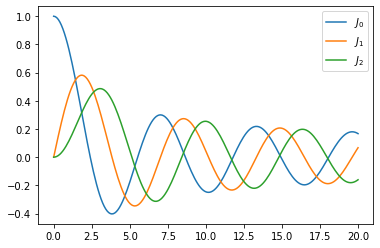

In [143]:
plt.plot(j_0[0],j_0[1]);
plt.plot(j_1[0],j_1[1]);
plt.plot(j_2[0],j_2[1]);
plt.legend(["$J_0$","$J_1$","$J_2$"]);

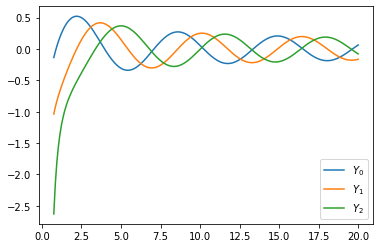

In [59]:
plt.plot(y_0[0],y_0[1])
plt.plot(y_1[0],y_1[1])
plt.plot(y_2[0],y_2[1])
plt.legend(["$Y_0$","$Y_1$","$Y_2$"])

In [111]:
def bessel_eqn(x):
    val = sp.special.jn(2,x)*sp.special.yn(2,x)-sp.special.jn(0,x)*sp.special.yn(0,x)
    return val

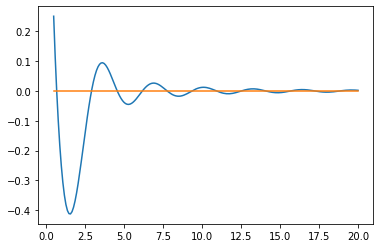

In [141]:
num=200
bessel_sub_x = np.linspace(0.5,20,num)
bessel_sub = [0]*num
for i in range(0,num):
    bessel_sub[i] = bessel_eqn(bessel_sub_x[i])
plt.plot(bessel_sub_x,bessel_sub);
plt.plot(bessel_sub_x,[0]*num);

In [90]:
def root_bisection(xmin,xmax,func_eval,tol):
    num_calls = 0
    x_low = xmin
    x_high = xmax
    low_val = func_eval(x_low)
    num_calls += 1 
    high_val = func_eval(x_high)
    num_calls += 1 
    x_mid = 0.5*(x_high+x_low)
    mid_val = func_eval(x_mid)
    num_calls += 1 
    while abs(mid_val)>=tol and ((low_val<=0 and high_val>0) or (low_val>0 and high_val<=0)):
        #continue search for root
        x_mid = 0.5*(x_high+x_low)
        mid_val = func_eval(x_mid)
        num_calls += 1 
        if (mid_val>=0 and low_val>=0) or (mid_val<=0 and low_val<=0): #same sign
            x_low = x_mid
            low_val = mid_val
        elif (mid_val>=0 and high_val>=0) or (mid_val<=0 and high_val<=0): #same sign
            x_high = x_mid
            high_val = mid_val
    #end search for root
    return x_mid,mid_val,num_calls

In [95]:
def root_reguli_falsi(xmin,xmax,func_eval,tol):
    num_calls = 0
    x_low = xmin
    x_high = xmax
    low_val = func_eval(x_low)
    num_calls += 1 
    high_val = func_eval(x_high)
    num_calls += 1 
    x_mid = x_low-low_val*(x_high-x_low)/(high_val-low_val)
    mid_val = func_eval(x_mid)
    num_calls += 1 
    while abs(mid_val)>=tol and ((low_val<=0 and high_val>0) or (low_val>0 and high_val<=0)):
        x_mid = x_low-low_val*(x_high-x_low)/(high_val-low_val)
        mid_val = func_eval(x_mid)
        num_calls += 1 
        if (mid_val>=0 and low_val>=0) or (mid_val<=0 and low_val<=0): #same sign
            x_low = x_mid
            low_val = mid_val
        elif (mid_val>=0 and high_val>=0) or (mid_val<=0 and high_val<=0): #same sign
            x_high = x_mid
            high_val = mid_val
    #end search for root
    return x_mid,mid_val,num_calls    

In [98]:
def root_secant(xmin,xmax,func_eval,tol):
    num_calls = 0
    x_low = xmin
    x_high = xmax
    low_val = func_eval(x_low)
    num_calls += 1 
    high_val = func_eval(x_high)
    num_calls += 1 
    x_mid = x_low-low_val*(x_high-x_low)/(high_val-low_val)
    mid_val = func_eval(x_mid)
    num_calls += 1 
    while abs(mid_val)>=tol:
        x_mid = x_low-low_val*(x_high-x_low)/(high_val-low_val)
        mid_val = func_eval(x_mid)
        num_calls += 1 
        x_low = x_high
        low_val = high_val
        x_high = x_mid
        high_val = mid_val
    #end search for root
    return x_mid,mid_val,num_calls  

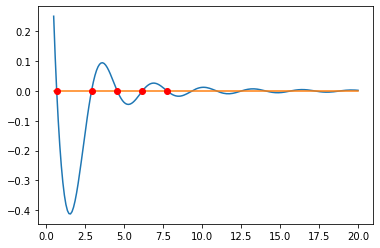

In [167]:
tolerance = 1e-7
bis_zero_1 = root_bisection(0.2,1,bessel_eqn,tolerance)
bis_zero_2 = root_bisection(2.5,3,bessel_eqn,tolerance)
bis_zero_3 = root_bisection(3,5,bessel_eqn,tolerance)
bis_zero_4 = root_bisection(5.3,7,bessel_eqn,tolerance)
bis_zero_5 = root_bisection(7,8,bessel_eqn,tolerance)
plt.plot(bessel_sub_x,bessel_sub);
plt.plot(bessel_sub_x,[0]*num);
plt.plot(bis_zero_1[0],bis_zero_1[1],'ro');
plt.plot(bis_zero_2[0],bis_zero_2[1],'ro');
plt.plot(bis_zero_3[0],bis_zero_3[1],'ro');
plt.plot(bis_zero_4[0],bis_zero_4[1],'ro');
plt.plot(bis_zero_5[0],bis_zero_5[1],'ro');

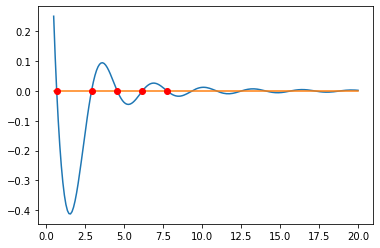

In [168]:
# tolerance = 1e-6
rf_zero_1 = root_reguli_falsi(0.2,1,bessel_eqn,tolerance)
rf_zero_2 = root_reguli_falsi(2.5,3,bessel_eqn,tolerance)
rf_zero_3 = root_reguli_falsi(3,5,bessel_eqn,tolerance)
rf_zero_4 = root_reguli_falsi(5.3,7,bessel_eqn,tolerance)
rf_zero_5 = root_reguli_falsi(7,8,bessel_eqn,tolerance)
plt.plot(bessel_sub_x,bessel_sub);
plt.plot(bessel_sub_x,[0]*num);
plt.plot(rf_zero_1[0],rf_zero_1[1],'ro');
plt.plot(rf_zero_2[0],rf_zero_2[1],'ro');
plt.plot(rf_zero_3[0],rf_zero_3[1],'ro');
plt.plot(rf_zero_4[0],rf_zero_4[1],'ro');
plt.plot(rf_zero_5[0],rf_zero_5[1],'ro');

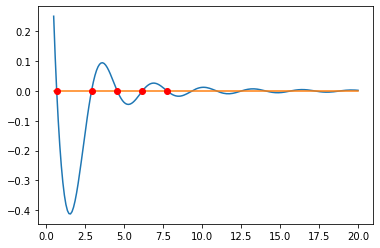

In [169]:
# tolerance = 1e-6
sec_zero_1 = root_secant(0.2,1,bessel_eqn,tolerance)
sec_zero_2 = root_secant(2.5,3,bessel_eqn,tolerance)
sec_zero_3 = root_secant(3,5,bessel_eqn,tolerance)
sec_zero_4 = root_secant(5.3,7,bessel_eqn,tolerance)
sec_zero_5 = root_secant(7,8,bessel_eqn,tolerance)
plt.plot(bessel_sub_x,bessel_sub);
plt.plot(bessel_sub_x,[0]*num);
plt.plot(sec_zero_1[0],sec_zero_1[1],'ro');
plt.plot(sec_zero_2[0],sec_zero_2[1],'ro');
plt.plot(sec_zero_3[0],sec_zero_3[1],'ro');
plt.plot(sec_zero_4[0],sec_zero_4[1],'ro');
plt.plot(sec_zero_5[0],sec_zero_5[1],'ro');

### Comparison of function calls

In [178]:
print("root\t\tbisection\treguli falsi\tsecant")
print(str(round(bis_zero_1[0],7))+"\t"+str(bis_zero_1[2])+"\t\t"+str(rf_zero_1[2])+"\t\t"+str(sec_zero_1[2]))
print(str(round(bis_zero_2[0],7))+"\t"+str(bis_zero_2[2])+"\t\t"+str(rf_zero_2[2])+"\t\t"+str(sec_zero_2[2]))
print(str(round(bis_zero_3[0],7))+"\t"+str(bis_zero_3[2])+"\t\t"+str(rf_zero_3[2])+"\t\t"+str(sec_zero_3[2]))
print(str(round(bis_zero_4[0],7))+"\t"+str(bis_zero_4[2])+"\t\t"+str(rf_zero_4[2])+"\t\t"+str(sec_zero_4[2]))
print(str(round(bis_zero_5[0],7))+"\t"+str(bis_zero_5[2])+"\t\t"+str(rf_zero_5[2])+"\t\t"+str(sec_zero_5[2]))

root		bisection	reguli falsi	secant
0.6943909	19		20		9
2.924562	22		11		7
4.5748272	22		8		8
6.1816856	19		8		9
7.7733765	16		7		7
